# Intro

L1, L2 regularization are 2 closely techniques that can be used by reducing ***over-fitting*** problem in machine learning. 

The ***loss Function*** known as (error = $expectations(y(predict) - y(true))$) can be modified by L1, L2 regularization  by adding 
the ***extra*** L1, L2 term :

- L1 regularization
    > - error = $expectations(y(predict) - y(true))**2$) +  λ*sigma(|beta_i|)

- L2 regularization
    > - error = $expectations(y(predict) - y(true))**2$) +  λ*sigma((beta_i)**2)
 

Both these 2 approached can reduce over-fitting in cases, but the modified model accuracy and computing speed may be big differences sometime, we will discuss further about how to obtain L1, L2 terms, the relation between L1, L2, and learning rate in this notebook.

> In brief, regularization is the way we prevent model feat "too perfectly" with the redundant features 
>







 
L1 Penalty and Sparsity in Logistic Regression :

demo below show how L1, L2 "reduce" effect from redundant features
that make features sparsity that make model much simple for avoiding 
over fitting and learn from "not good" features


ps :  C=1/lambda, the small C, the stronger L1, L2 regression



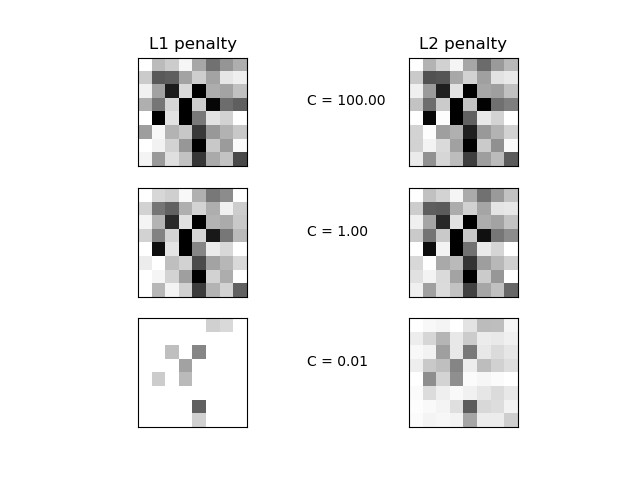

In [12]:
# credit : http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html

from IPython.display import Image
print (""" 
L1 Penalty and Sparsity in Logistic Regression :

demo below show how L1, L2 "reduce" effect from redundant features
that make features sparsity that make model much simple for avoiding 
over fitting and learn from "not good" features


ps :  C=1/lambda, the small C, the stronger L1, L2 regression
""")
Image(filename='L1_L2_Penalty_Sparcity.png')


# Application :

- Linear regression:
    - L1 regularization :  Lasso Regression 
         -  Least Absolute Shrinkage and Selection Operator
    - L2 regularization :  Ridge Regression
    
    
- Logistics regression 
  
  
# Ref :

- https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

In [1]:
# analysis library
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

# ML
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


# 1) Demo : 
      - Lasso, Ridge Regression

## 1-0)  Model complexity :Polynomial  regression

In [67]:
# help function
# linear regression model 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    """
    RSS refers to ‘Residual Sum of Squares’ : 
    sum of square of errors between the predicted 
    and actual values in the training data set
    """
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

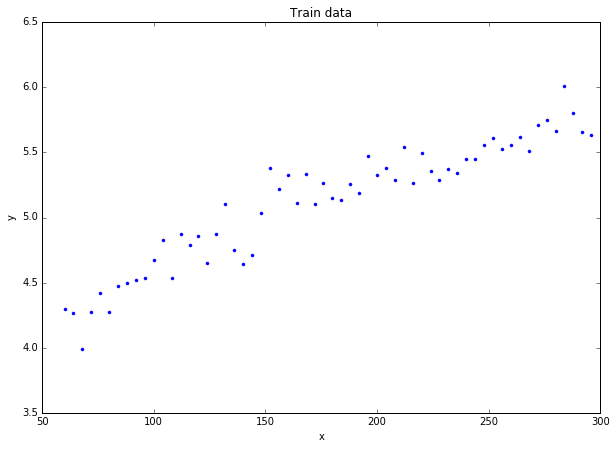

In [56]:
# generate log like toy data with noise 

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 7

#Define input array with angles from 60deg to 300deg converted to radians
#x = np.array([i*np.pi/180 for i in range(60,300,4)])
x = np.array([i for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
#y = np.sin(x) + np.random.normal(0,0.15,len(x))
y = np.log(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')
plt.title('Train data')
plt.xlabel('x')
plt.ylabel('y')

In [57]:
# build polynomial regression (x**1 - x**15) with powers of x form 1 to 15.

for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
#print (data.head())
data.head(3)

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,60.0,4.294083,3600.0,216000.0,12960000.0,7.776000e+08,4.665600e+10,2.799360e+12,1.679616e+14,1.007770e+16,6.046618e+17,3.627971e+19,2.176782e+21,1.306069e+23,7.836416e+24,4.701850e+26
1,64.0,4.266175,4096.0,262144.0,16777216.0,1.073742e+09,6.871948e+10,4.398047e+12,2.814750e+14,1.801440e+16,1.152922e+18,7.378698e+19,4.722366e+21,3.022315e+23,1.934281e+25,1.237940e+27
2,68.0,3.987698,4624.0,314432.0,21381376.0,1.453934e+09,9.886748e+10,6.722989e+12,4.571632e+14,3.108710e+16,2.113923e+18,1.437468e+20,9.774779e+21,6.646850e+23,4.519858e+25,3.073503e+27


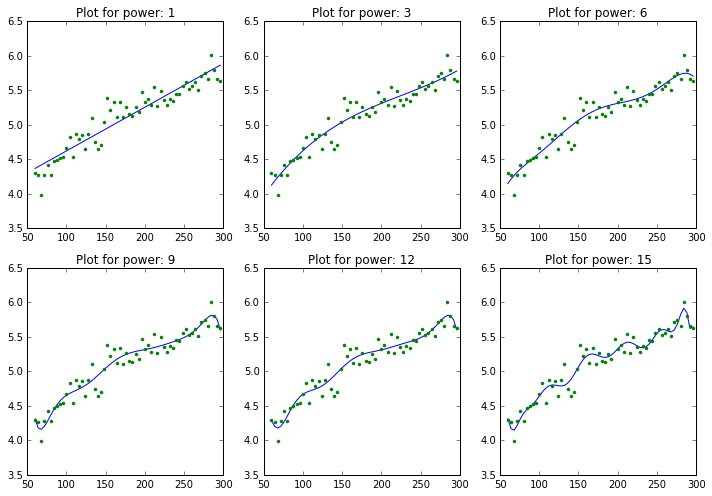

In [59]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [61]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,1.5,4,0.0064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,1.1,3.5,0.013,-1.8e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,3,0.024,-8.5e-05,1.2e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1,3.5,0.0095,5.2e-05,-4.2e-07,7.7e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,5.4,-0.061,0.001,-6.4e-06,1.9e-08,-2e-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-0.52,0.2,-0.0035,3.3e-05,-1.6e-07,4e-10,-3.9e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,22,-0.94,0.021,-0.00023,1.5e-06,-5.7e-09,1.1e-11,-9.5e-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,45,-2.4,0.055,-0.0007,5.3e-06,-2.5e-08,6.8e-11,-1e-13,6.6e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-11,0.29,-0.0045,4.3e-05,-2.6e-07,1e-09,-2.6e-12,3.6e-15,-2.2e-18,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-8.4,0.22,-0.0032,2.7e-05,-1.4e-07,4.1e-10,-3.9e-13,-1.2e-15,4e-18,-3.5e-21,NaN,NaN,NaN,NaN,NaN


> So, from polynomial modeling approach above, we can see the model get much more complexity (coffecient of high polynomial terms) when polynomial powers get larger 





## 1-1) Ridge Regression

//anaconda/envs/g_dash/lib/python3.4/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.088744863659296e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


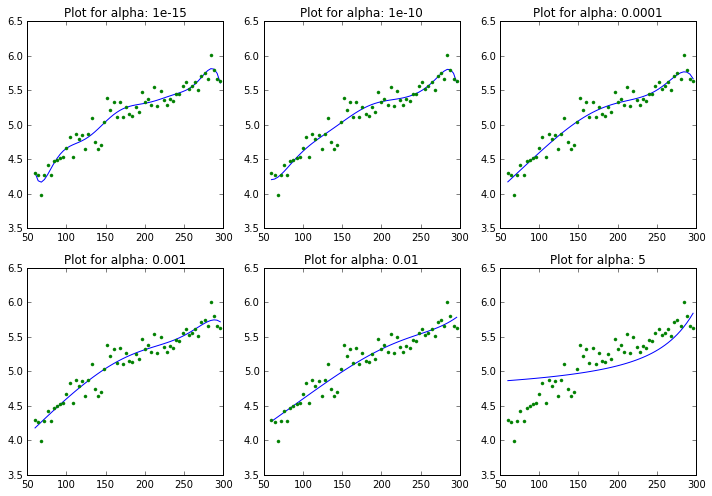

In [63]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

> When alpha increases (L2 regularization), the model complexity reduces. 
Thing to notice is :  though high values of alpha can reduce over-fitting ; significantly high values can cause under-fitting in cases as well. How to select a right alpha can be a core part of model tuning : cross-validation...



In [65]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,96,-5.1,0.11,-0.0012,5.7e-06,3.2e-09,-1.4e-10,3.1e-13,1.3e-15,-3.7e-18,-1.5e-20,4e-23,1.5e-25,-6.5e-28,7.1e-31,-1.1e-34
alpha_1e-10,0.92,14,-0.48,0.0092,-7.9e-05,2.7e-07,2.6e-10,-2.6e-12,-5.2e-15,1.7e-17,9.6e-20,6.1e-23,-9.2e-25,-3.4e-27,3.1e-30,5.5e-32,-1e-34
alpha_1e-08,0.95,4.2,-0.017,0.00044,-2.8e-06,4.2e-09,2e-11,-1.5e-14,-1.9e-16,-3.5e-19,4.7e-22,3.8e-24,8e-27,4.4e-30,1.7e-32,1.7e-34,-1.6e-36
alpha_0.0001,0.96,3.6,0.0095,1.2e-05,-1.2e-08,-1.6e-10,-7.1e-13,-2e-15,-2.9e-18,7e-21,7.8e-23,4e-25,1.5e-27,4e-30,4.9e-33,-3.1e-35,-3.3e-37
alpha_0.001,0.99,3.5,0.011,4.3e-06,-3e-08,-1.4e-10,-4e-13,-6.7e-16,4.2e-19,9.5e-21,5.1e-23,2e-25,6.1e-28,1.4e-30,5.1e-34,-1.7e-35,-1.4e-37
alpha_0.01,1.1,3.8,0.0075,5.7e-06,-6.7e-09,-5.3e-11,-1.8e-13,-4.2e-16,-6.2e-19,4.8e-22,8.2e-24,4.1e-26,1.5e-28,4.1e-31,7.3e-34,-9.4e-37,-1.8e-38
alpha_1,3.1,4.6,0.0016,3.3e-06,7.9e-09,1.9e-11,4.8e-14,1.2e-16,2.7e-19,5.7e-22,1e-24,7.4e-28,-5.3e-30,-4.1e-32,-2.1e-34,-9.2e-37,-3.8e-39
alpha_5,5.5,4.8,0.00062,1.4e-06,4e-09,1.2e-11,3.4e-14,1e-16,3.1e-19,9.3e-22,2.8e-24,8.6e-27,2.6e-29,7.9e-32,2.4e-34,7.2e-37,2.2e-39
alpha_10,6.8,4.9,0.00039,9.4e-07,2.7e-09,8.3e-12,2.6e-14,8.1e-17,2.5e-19,8.1e-22,2.6e-24,8.2e-27,2.6e-29,8.5e-32,2.7e-34,8.8e-37,2.8e-39
alpha_20,8.4,5,0.00023,5.8e-07,1.8e-09,5.5e-12,1.8e-14,5.6e-17,1.8e-19,6e-22,2e-24,6.4e-27,2.1e-29,6.9e-32,2.3e-34,7.5e-37,2.5e-39


> -  The RSS  (Residual Sum of Squares) increases with increase in alpha, i.e. the model complexity reduces because of big alpha 
- High alpha values can lead to significant under-fitting. Note the rapid increase in RSS for values of alpha greater than 1


## 1-2) Lasso Regression